In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl
from matplotlib import style

mpl.rcParams.update(mpl.rcParamsDefault)


# Data
city_data_df = pd.read_csv(R'Resources/city_data.csv')
ride_data_df = pd.read_csv(R'Resources/ride_data.csv')

# Inspect city data
print(city_data_df.isnull().sum())
print(city_data_df.dtypes)

city            0
driver_count    0
type            0
dtype: int64
city            object
driver_count     int64
type            object
dtype: object


In [61]:
# City type sums
print(city_data_df['type'].unique())
print(f"Urban: {sum(city_data_df['type']=='Urban')} Suburban: {sum(city_data_df['type']=='Suburban')} Rural: {sum(city_data_df['type']=='Rural')}")

['Urban' 'Suburban' 'Rural']
Urban: 66 Suburban: 36 Rural: 18


In [62]:
# Driver counts
urban_driver_count = city_data_df.groupby(['type']).sum()['driver_count']
urban_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [63]:
# Inspect ride data
print(ride_data_df.isnull().sum())
print(ride_data_df.dtypes)

city       0
date       0
fare       0
ride_id    0
dtype: int64
city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [64]:
# Merge data
merged_data_df = pd.merge(ride_data_df, city_data_df, how='left', on='city')
merged_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [65]:
# DataFrames for each type of city. 
urban_cities_df = merged_data_df[merged_data_df['type'] == 'Urban']
suburban_cities_df = merged_data_df[merged_data_df['type'] == 'Suburban']
rural_cities_df = merged_data_df[merged_data_df['type'] == 'Rural']

In [66]:
# Number of rides per city for each city type
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

# Average fare per city for each city type
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df .groupby(['city']).mean()['fare']

# Average number of drivers for each city type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']


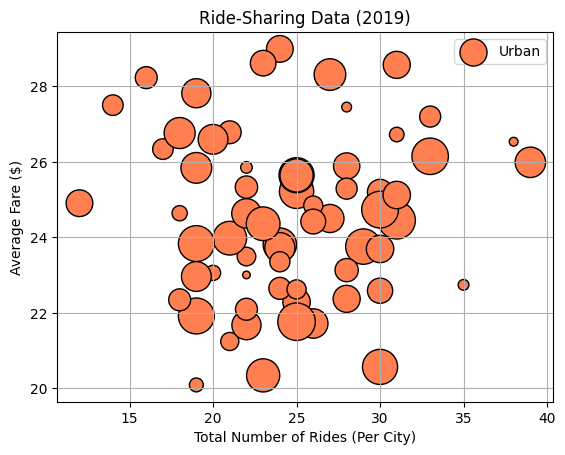

In [67]:
# Bubble plot for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c='coral', 
            edgecolor='black', linewidths=1, label='Urban')

plt.title('Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()
plt.show()

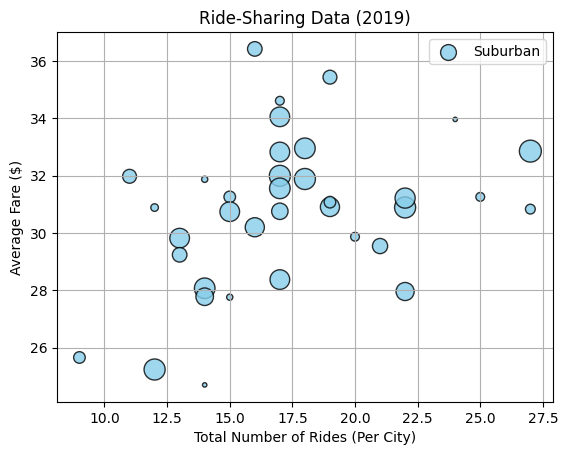

In [68]:
# Bubble plot for suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, label='Suburban')

plt.title('Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()
plt.show()

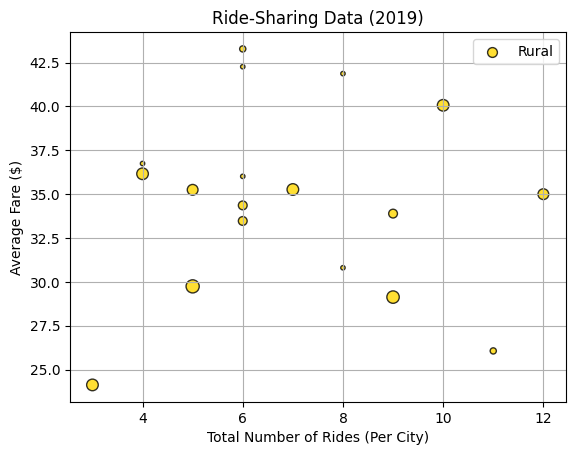

In [69]:
# Bubble plot for rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c='gold', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, label='Rural')

plt.title('Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()
plt.show()

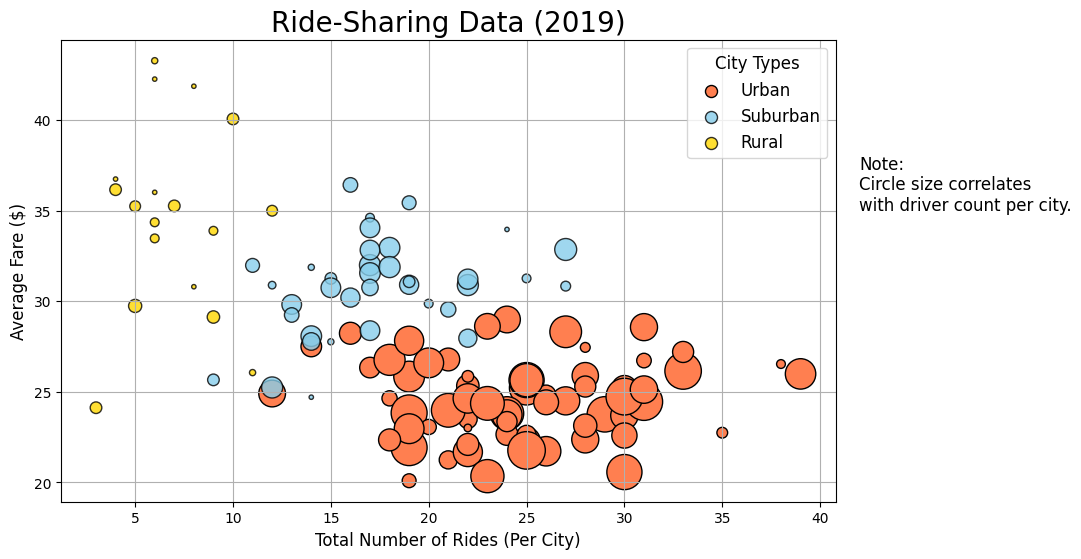

In [70]:
# Combined plot for all cities
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c='coral', 
            edgecolor='black', linewidths=1, label='Urban')

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, label='Suburban')

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c='gold', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, label='Rural')

# Info
plt.title('Ride-Sharing Data (2019)',fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.grid(True)

# Legend
lgnd = plt.legend(fontsize='12', mode='Expanded',scatterpoints=1, 
                  loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Text note
plt.text(42, 35, 'Note:\nCircle size correlates\nwith driver count per city.',fontsize=12)

plt.savefig(R'Analysis/ride_share_data.png')
plt.show()

In [71]:
# Summary statistics
print(urban_cities_df.describe(),suburban_cities_df.describe(),rural_cities_df.describe())
print(urban_ride_count.describe(),suburban_ride_count.describe(),rural_ride_count.describe())

              fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000              fare       ride_id  driver_count
count  625.000000  6.250000e+02    625.000000
mean    30.970128  4.971015e+12     13.712000
std     10.677508  2.912410e+12      8.042372
min     12.050000  3.218337e+08      1.000000
25%     21.970000  2.364253e+12      5.000000
50%     30.750000  5.053221e+12     16.000000
75%     39.830000  7.551674e+12     21.000000
max     49.960000  9.917744e+12     25.000000              fare       ride_id  driver_count
count  125.000000  1.250000e+02    125.000000
mean    34.623440  4.647746e+12      4.296000
std     14.558046  2.8878

In [72]:
# Central tendency for the ride count for urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
median_urban_ride_count = np.median(urban_ride_count)
mode_urban_ride_count = sts.mode(urban_ride_count)

print(f'''
Ride Counts for Urban. 
Mean: {mean_urban_ride_count:.2f}.                             
Median: {median_urban_ride_count}.
Mode: {mode_urban_ride_count}.
''')


Ride Counts for Urban. 
Mean: 24.62.                             
Median: 24.0.
Mode: ModeResult(mode=array([22], dtype=int64), count=array([7])).



In [73]:
# Central tendency for the fare for suburban cites
mean_suburban_ride_count = np.mean(suburban_ride_count)
median_suburban_ride_count = np.median(suburban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)

print(f'''
Ride Counts for Suburban. 
Mean: {mean_suburban_ride_count:.2f}.                             
Median: {median_suburban_ride_count}.
Mode: {mode_suburban_ride_count}.
''')


Ride Counts for Suburban. 
Mean: 17.36.                             
Median: 17.0.
Mode: ModeResult(mode=array([17], dtype=int64), count=array([7])).



In [74]:
# Central tendency for the fare for rural cites
mean_rural_ride_count = np.mean(rural_ride_count)
median_rural_ride_count = np.median(rural_ride_count)
mode_rural_ride_count = sts.mode(rural_ride_count)

print(f'''
Ride Counts for Rural. 
Mean: {mean_rural_ride_count:.2f}.                             
Median: {median_rural_ride_count}.
Mode: {mode_rural_ride_count}.
''')


Ride Counts for Rural. 
Mean: 6.94.                             
Median: 6.0.
Mode: ModeResult(mode=array([6], dtype=int64), count=array([5])).



In [75]:
# Central tendency for the average fare for urban cities.
urban_fares = urban_cities_df['fare']

mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)
print(f'''
Fare Price for Urban. 
Mean: {mean_urban_fares:.2f}.                             
Median: {median_urban_fares}.
Mode: {mode_urban_fares}.
''')

mean_urban_avg_fare = np.mean(urban_avg_fare)
median_urban_avg_fare = np.median(urban_avg_fare)
mode_urban_avg_fare = sts.mode(urban_avg_fare)
print(f'''
Average Fare Price for Urban. 
Mean: {mean_urban_avg_fare:.2f}.                             
Median: {median_urban_avg_fare}.
Mode: {mode_urban_avg_fare}.
''')


Fare Price for Urban. 
Mean: 24.53.                             
Median: 24.64.
Mode: ModeResult(mode=array([22.86]), count=array([5])).


Average Fare Price for Urban. 
Mean: 24.50.                             
Median: 24.47673237753883.
Mode: ModeResult(mode=array([20.09315789]), count=array([1])).



In [76]:
# Central tendency for the average fare for suburban cities.
suburban_fares = suburban_cities_df['fare']

mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)
print(f'''
Fare Price for Suburban. 
Mean: {mean_suburban_fares:.2f}.                             
Median: {median_suburban_fares}.
Mode: {mode_suburban_fares}.
''')

mean_suburban_avg_fares = np.mean(suburban_avg_fare)
median_suburban_avg_fares = np.median(suburban_avg_fare)
mode_suburban_avg_fares = sts.mode(suburban_avg_fare)
print(f'''
Average Fare Price for Suburban. 
Mean: {mean_suburban_avg_fares:.2f}.                             
Median: {median_suburban_avg_fares}.
Mode: {mode_suburban_avg_fares}.
''')


Fare Price for Suburban. 
Mean: 30.97.                             
Median: 30.75.
Mode: ModeResult(mode=array([17.99]), count=array([3])).


Average Fare Price for Suburban. 
Mean: 30.74.                             
Median: 30.90200956937799.
Mode: ModeResult(mode=array([24.70428571]), count=array([1])).



In [77]:
# Central tendency for the fare for rural cites
rural_fares = rural_cities_df['fare']

mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)
print(f'''
Fare Price for Rural. 
Mean: {mean_rural_fares:.2f}.                             
Median: {median_rural_fares}.
Mode: {mode_rural_fares}.
''')

mean_rural_avg_fare = np.mean(rural_avg_fare)
median_rural_avg_fare = np.median(rural_avg_fare)
mode_rural_avg_fare = sts.mode(rural_avg_fare)
print(f'''
Average Fare Price for Rural. 
Mean: {mean_rural_avg_fare:.2f}.                             
Median: {median_rural_avg_fare}.
Mode: {mode_rural_avg_fare}.
''')


Fare Price for Rural. 
Mean: 34.62.                             
Median: 37.05.
Mode: ModeResult(mode=array([37.05]), count=array([2])).


Average Fare Price for Rural. 
Mean: 34.64.                             
Median: 35.12174999999999.
Mode: ModeResult(mode=array([24.12333333]), count=array([1])).



In [78]:
# Central tendency for the number of drivers for urban cities.
urban_drivers = urban_cities_df['driver_count']

mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)
print(f'''
Number of drivers for Urban. 
Mean: {mean_urban_drivers:.2f}.                             
Median: {median_urban_drivers}.
Mode: {mode_urban_drivers}.
''')


Number of drivers for Urban. 
Mean: 36.68.                             
Median: 37.0.
Mode: ModeResult(mode=array([39], dtype=int64), count=array([86])).



In [79]:
# Central tendency for the number of drivers for suburban cities
suburban_drivers = suburban_cities_df['driver_count']

mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'''
Number of drivers for Suburban. 
Mean: {mean_suburban_drivers:.2f}.                             
Median: {median_suburban_drivers}.
Mode: {mode_suburban_drivers}.
''')


Number of drivers for Suburban. 
Mean: 13.71.                             
Median: 16.0.
Mode: ModeResult(mode=array([20], dtype=int64), count=array([79])).



In [80]:
# Central tendency for the number of drivers for rural cities
rural_drivers = rural_cities_df['driver_count']

mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)
print(f'''
Fare Price for Rural. 
Mean: {mean_rural_drivers:.2f}.                             
Median: {median_rural_drivers}.
Mode: {mode_rural_drivers}.
''')


Fare Price for Rural. 
Mean: 4.30.                             
Median: 4.0.
Mode: ModeResult(mode=array([1], dtype=int64), count=array([32])).



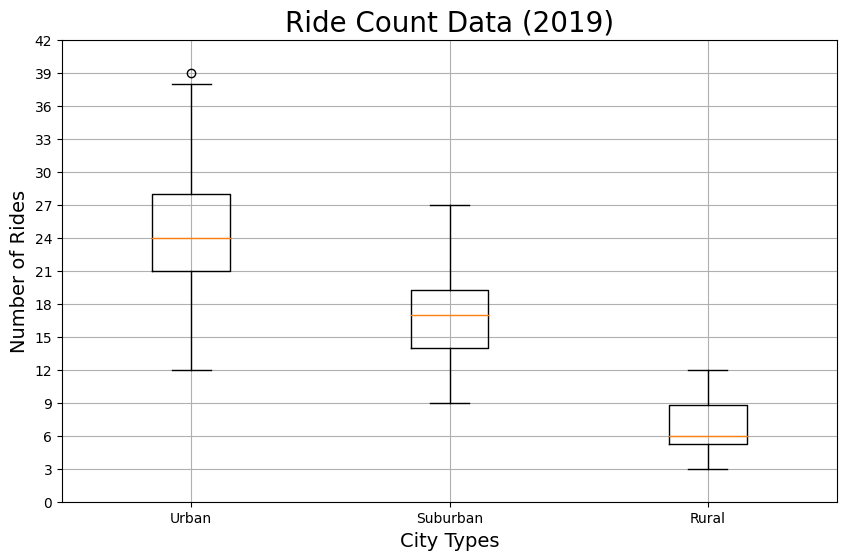

In [81]:
# B&W Plots for ride count
x_labels = ['Urban', 'Suburban','Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

plt.savefig('Analysis/ride_count_data.png')
plt.show()

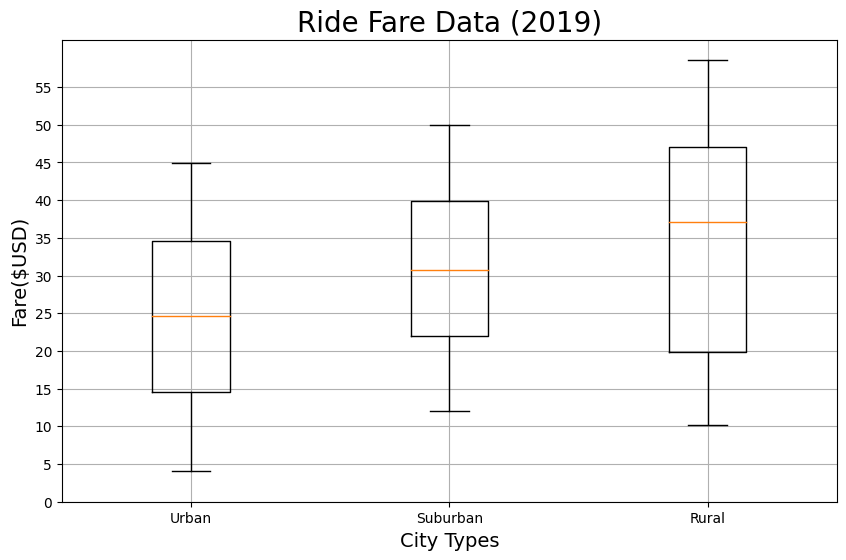

In [82]:
#B&W Plots for fare
x_labels = ['Urban', 'Suburban','Rural']
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 56, step=5.0))
ax.grid()

plt.savefig('Analysis/ride_fare_data.png')
plt.show()

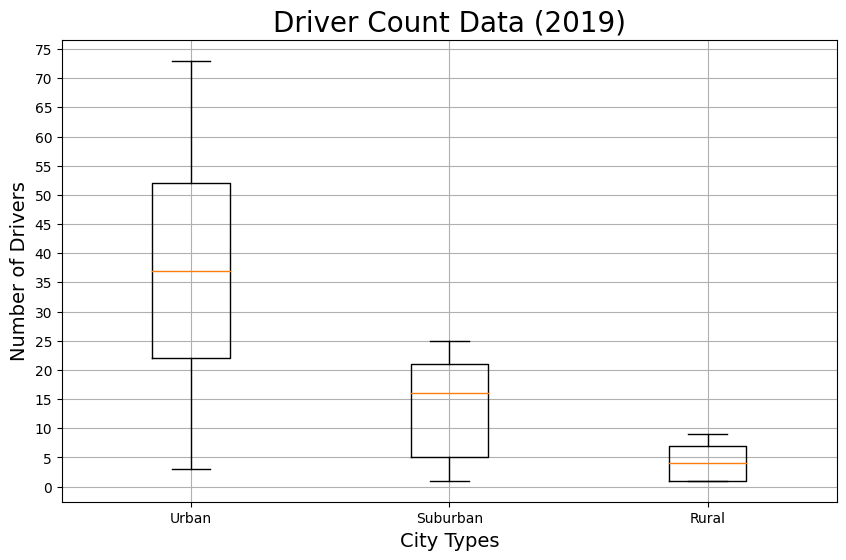

In [83]:
# B&W Plots for driver count
x_labels = ['Urban', 'Suburban','Rural']
fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()

plt.savefig('Analysis/driver_count_data.png')
plt.show()

In [84]:
# Percentages by type
type_percents = 100 * merged_data_df.groupby(['type']).sum()['fare'] / merged_data_df['fare'].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

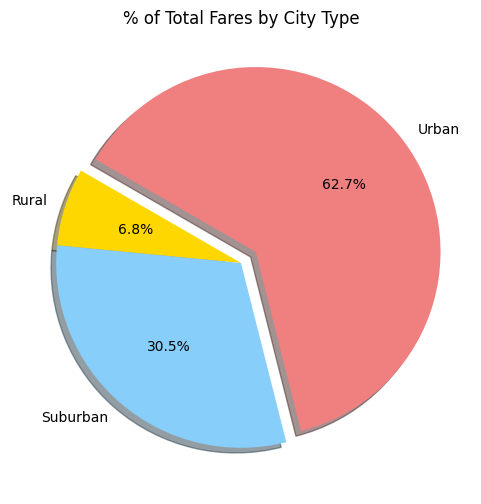

In [85]:
# Percentage of types
type_percents = 100 * merged_data_df.groupby(['type']).sum()['fare'] / merged_data_df['fare'].sum()

plt.subplots(figsize=(7, 6))
plt.pie(type_percents, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title(R'% of Total Fares by City Type')
plt.rcParams['font.size'] = 14 

plt.savefig('analysis/perc_type_pie.png')
plt.show()

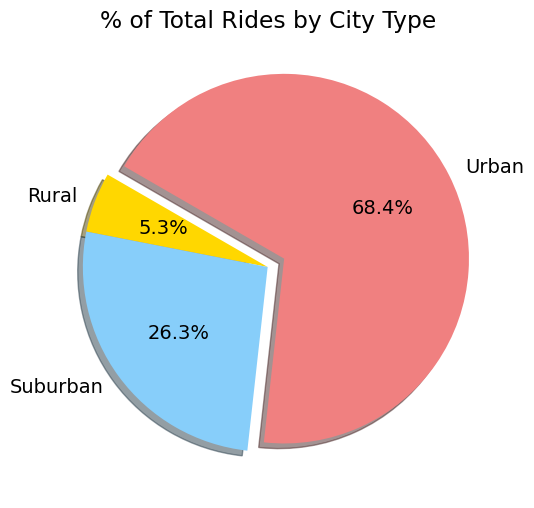

In [86]:
# Percentage of rides
ride_percents = 100 * merged_data_df.groupby(['type']).count()['ride_id'] / merged_data_df['ride_id'].count()

plt.subplots(figsize=(7, 6))
plt.pie(ride_percents, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title(R'% of Total Rides by City Type')
plt.rcParams['font.size'] = 14

plt.savefig('Analysis/perc_ride_pie.png')
plt.show()

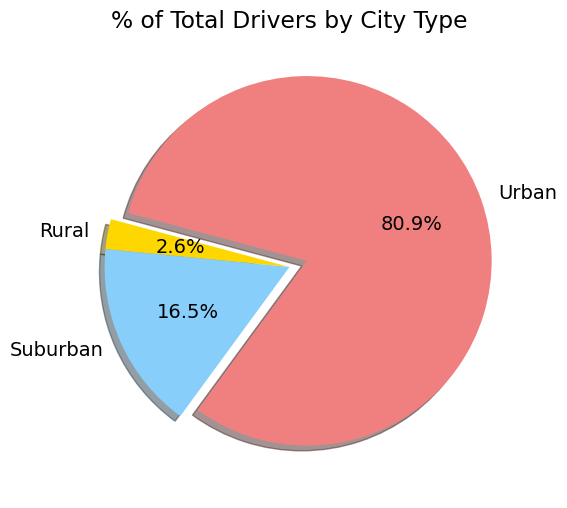

In [87]:
# Percentage of drivers
driver_percents = 100 * city_data_df.groupby(['type']).sum()['driver_count'] / city_data_df['driver_count'].sum()

plt.subplots(figsize=(7, 6))
plt.pie(driver_percents, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%',
        shadow=True, startangle=165)
plt.title(R'% of Total Drivers by City Type')
plt.rcParams['font.size'] = 14

plt.savefig('Analysis/perc_drivers_pie.png')
plt.show()

In [88]:
# Ride summary dateframe table for each city type
total_rides_by_type = merged_data_df.groupby(["type"]).count()["ride_id"]
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_fare_by_type = merged_data_df.groupby(["type"]).sum()["fare"]

avg_fare_per_ride = total_fare_by_type / total_rides_by_type
avg_fare_per_driver = total_fare_by_type / total_drivers_by_type 

ride_summary_df = pd.DataFrame({
    "Total Rides": total_rides_by_type,
    "Total Drivers": total_drivers_by_type,
    "Total Fares": total_fare_by_type,
    "Average Fare per Ride": avg_fare_per_ride,
    "Average Fare per Driver": avg_fare_per_driver})

ride_summary_df.index.name = None

ride_summary_df[["Total Rides","Total Drivers"]] = ride_summary_df[["Total Rides","Total Drivers"]].applymap("{:,}".format)
ride_summary_df[["Total Fares", "Average Fare per Ride", "Average Fare per Driver"]] = ride_summary_df[["Total Fares", "Average Fare per Ride", "Average Fare per Driver"]].applymap("${:,.2f}".format)

ride_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [103]:
# Total weekly of the fares for each type of city.
sum_fare_by_type = merged_data_df.groupby(["type", "date"]).sum()[["fare"]] \
                                .reset_index() \
                                .pivot(index="date", columns="type", values="fare")

fares_Jan_April = sum_fare_by_type.loc['2019-01-01':'2019-04-28']
fares_Jan_April.index = pd.to_datetime(fares_Jan_April.index)
weekly_fares_df = fares_Jan_April.resample('W').sum()
weekly_fares_df


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


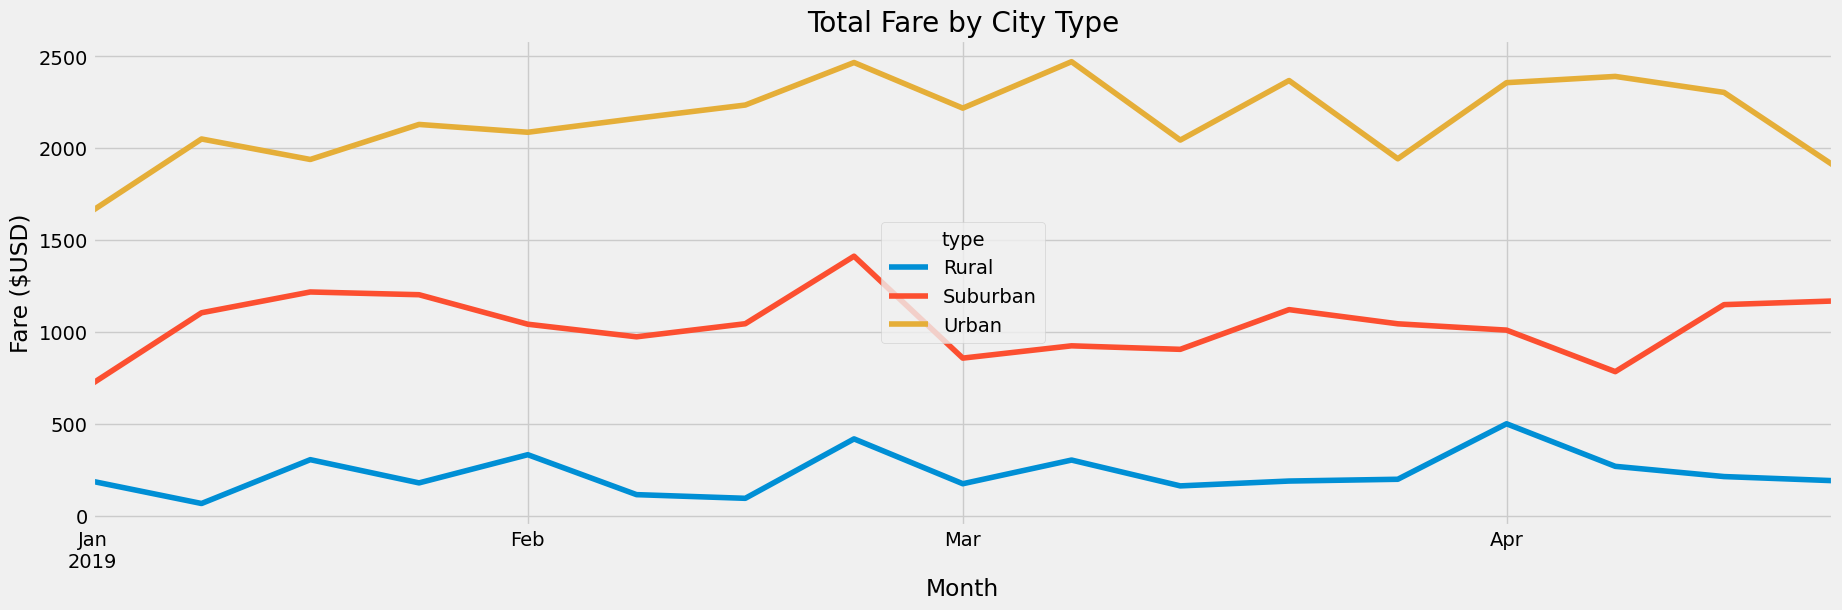

In [90]:
style.use('fivethirtyeight')
ax = weekly_fares_df.plot(figsize = (20,6))
ax.set_title("Total Fare by City Type")
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")
plt.savefig("analysis/Challenge_fare_summary.png")
plt.show()